# Root Finding Method With Comparision Of Graph

----------Bisection-------------
The value of root is :  1.3672
Counts :  7
-----------Regula Falsi------------
The value of root is :  1.3670
Count :  4
---------Newton Raphson--------------
The value of the root By Newton rephson method is :  1.3689
Counts :  3
------------Secant-----------
Root of the given equation = 1.369
No. of iterations =  3
-----------Muller Method------------
The value of root is :  1.3688
Count :  2


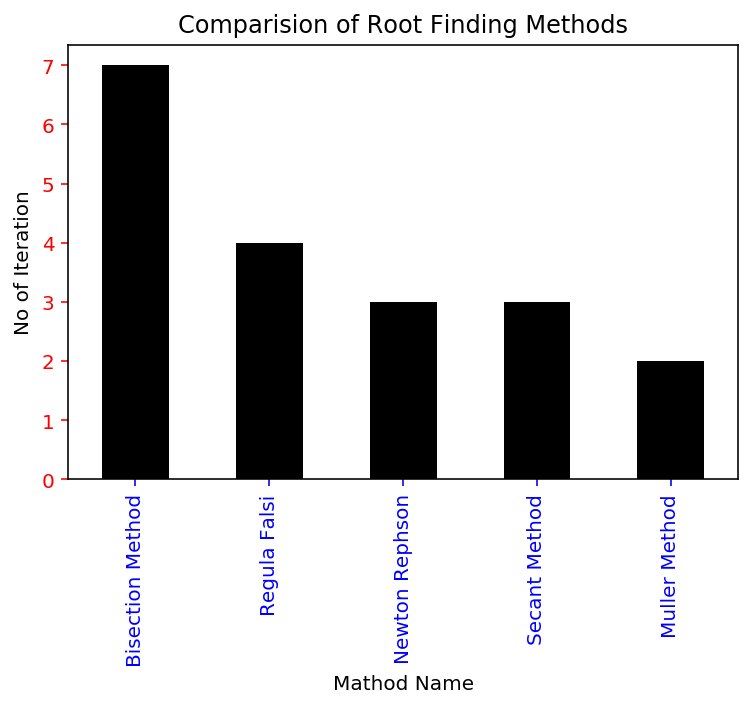

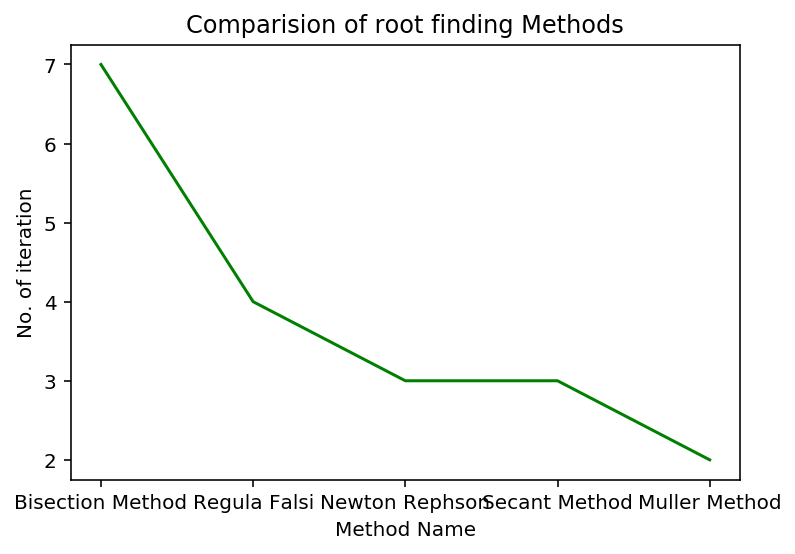

In [7]:
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

RF=0;
NR=0;
SC=0;
BM=0;
MM=0;

def func( x ): 
    return (1 * pow(x, 3) + 2 * x * x + 10 * x - 20); 
 

def derivFunc( x ):
    h=(derivative(func,x))
    return h

def f(x): 
    f = func(x) 
    return f; 
  
  
def newtonRaphson( x ,E):
    global NR
    newtonCount=0;
    h = func(x) / derivFunc(x) 
    while abs(h) >= E: 
        h = func(x)/derivFunc(x) 
          
        x = x - h 
        newtonCount=newtonCount+1;
    
    NR=newtonCount
    print("The value of the root By Newton rephson method is : ", "%.4f"% x) 
    print("Counts : ",newtonCount)
    

    
def bisection(a,b,E):
    global BM
    bisectionCount=0;
    if (func(a) * func(b) >= 0): 
        return
   
    c = a 
    while ((b-a) >= E): 
  
        c = (a+b)/2
   
        if (func(c) == 0.0): 
            break
   
        if (func(c)*func(a) < 0): 
            b = c 
        else: 
            a = c 
        bisectionCount=bisectionCount+1
    
    BM=bisectionCount
    print("The value of root is : ","%.4f"%c) 
    print("Counts : ",bisectionCount)
    

    
    
    

def secant(x1, x2, E): 
    global SC
    n = 0; xm = 0; x0 = 0; c = 0;  
    if (f(x1) * f(x2) < 0): 
        while True:  
               
            x0 = ((x1 * f(x2) - x2 * f(x1)) / 
                            (f(x2) - f(x1)));  
    
            c = f(x1) * f(x0);  
  
            x1 = x2;  
            x2 = x0;  
  
            n += 1;  
  
            if (c == 0):  
                break;  
            xm = ((x1 * f(x2) - x2 * f(x1)) / 
                            (f(x2) - f(x1))); 
              
            if(abs(xm - x0) < E): 
                break; 
                
        SC=n
        print("Root of the given equation =",  
                               round(x0, 4));  
        print("No. of iterations = ", n);  
          
    else: 
        print("Can not find a root in ", 
                   "the given inteval"); 
        
        
        

  
    
    
MAX_ITERATIONS = 10000; 


def Muller(b, c, a): 
    global MM
    res = 0; 
    i = 0; 

    while (True): 
    
        f1 = f(a); f2 = f(b); f3 = f(c); 
        d1 = f1 - f3; 
        d2 = f2 - f3; 
        h1 = a - c; 
        h2 = b - c; 
        a0 = f3; 
        a1 = (((d2 * pow(h1, 2)) - (d1 * pow(h2, 2))) / ((h1 * h2) * (h1 - h2))); 
        a2 = (((d1 * h2) - (d2 * h1)) / ((h1 * h2) * (h1 - h2))); 
        x = ((-2 * a0) / (a1 + abs(math.sqrt(a1 * a1 - 4 * a0 * a2)))); 
        y = ((-2 * a0) / (a1 - abs(math.sqrt(a1 * a1 - 4 * a0 * a2)))); 

        if (x >= y): 
            res = x + c; 
        else: 
            res = y + c; 
        m = res * 100; 
        n = c * 100; 
        m = math.floor(m); 
        n = math.floor(n); 
        if (m == n): 
            break; 
        a = b; 
        b = c; 
        c = res; 
        if (i > MAX_ITERATIONS): 
            print("Root cannot be found using", "Muller's method"); 
            break; 
        i += 1; 
    if (i <= MAX_ITERATIONS): 
        print("The value of root is : " , '%.4f'%res)
        print("Count : ",i)
        MM=i;
    
  


def regulaFalsi(a,b,TOL,N):
    global RF
    i = 1
    FA = f(a)
     
   
    while(i <= N):
        p = (a*f(b)-b*f(a))/(f(b) - f(a))
        FP = f(p)
          
        if(FP == 0 or np.abs(f(p)) < TOL):
            break
      
         
          
        i = i + 1
          
        if(FA*FP > 0):
            a = p
        else:
            b = p
    
    print("The value of root is : " , '%.4f'%a)
    print("Count : ",i)
    RF=i;
    return

def CallMethods(a,b,E):
    print("----------Bisection-------------")
    bisection(a, b,E)  
 
    print("-----------Regula Falsi------------")
    regulaFalsi(a,b,E,2000);

    print("---------Newton Raphson--------------")
    newtonRaphson(a,E)

    print("------------Secant-----------")
    secant(a, b, E);


    print("-----------Muller Method------------")
    Muller(a, b, E); 
    
    return


def draw_Graph():
    
    MethodName = ['Bisection Method','Regula Falsi','Newton Rephson','Secant Method', 'Muller Method']
   
    Count = [BM,RF,NR, SC,  MM]
     
    plt.plot(MethodName, Count, color='g')
    plt.xlabel('Method Name')
    plt.ylabel('No. of iteration')
    plt.title('Comparision of root finding Methods')
    plt.show()
    return


def draw_Bar_Graph():
    
    s = pd.Series(
        [BM,RF,NR, SC,  MM],
        index = ['Bisection Method','Regula Falsi','Newton Rephson','Secant Method', 'Muller Method']
        )


    plt.title("Comparision of Root Finding Methods")
    plt.ylabel('No of Iteration')
    plt.xlabel('Mathod Name')


    ax = plt.gca()
    ax.tick_params(axis='x', colors='blue')
    ax.tick_params(axis='y', colors='red')
   
    my_colors = 'Black'  

    s.plot( 
        kind='bar',
        color=my_colors,

    )

    plt.show()
    return



a =1
b =2
E = 0.01;



CallMethods(a,b,E)

draw_Bar_Graph()
draw_Graph()
    







# Changing In Tolerence 

----------Bisection-------------
The value of root is :  1.3688
Counts :  24
-----------Regula Falsi------------
The value of root is :  1.3688
Count :  100
---------Newton Raphson--------------
The value of the root By Newton rephson method is :  1.3688
Counts :  7
------------Secant-----------
Root of the given equation = 1.3688
No. of iterations =  9
-----------Muller Method------------
The value of root is :  1.3688
Count :  4


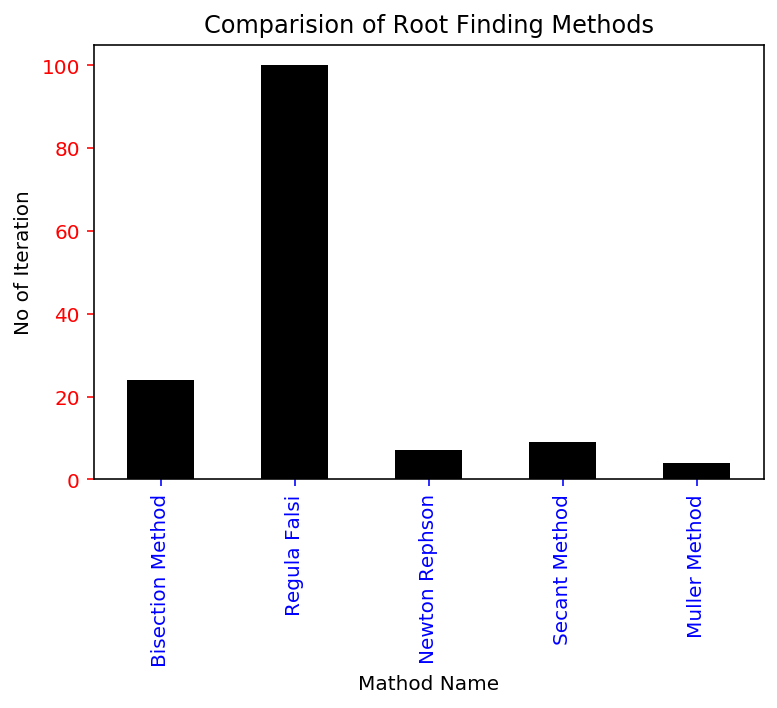

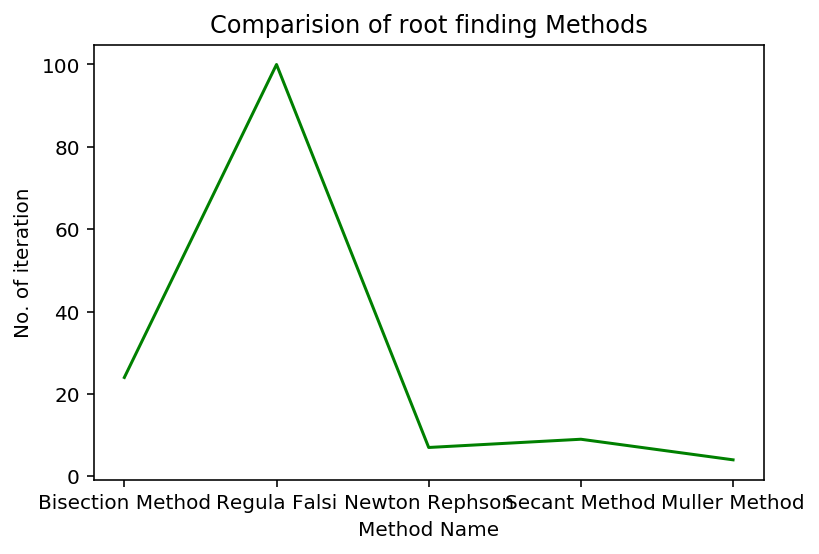

In [8]:
a =-1
b =9
E = 0.000001;



CallMethods(a,b,E)

draw_Bar_Graph()
draw_Graph()

# Root Finding Method With GUI  Based Implementation

In [9]:
from tkinter import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from sympy import Symbol, Derivative
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
window = Tk() 
window.title("Welcome to Root Finding Methods")
window.geometry('650x650')
window.resizable(width=False, height=False)
bg_image = PhotoImage(file ="bg.png")
x = Label (image = bg_image)
x.grid(row = 0, column = 0)
selected = DoubleVar()

lsta=[]
lstb=[]
lstc=[]
lstfa=[]
lstfb=[]
lstfc=[]
lstca=[]

def bisection():
    lsta=[]
    lstb=[]
    lstc=[]
    lstfa=[]
    lstfb=[]
    lstfc=[]
    lstca=[]
    print("Its Bisection")
    func=txt1.get()
    a=txt2.get()
    b=txt3.get()
    c=(float(a)+float(b))/2
    tolerance=selected.get()
    BisectionIteration=[0]
    function=""
    for char in func:
        if(char.isalpha()):
            char=char.replace(char, a)
        function=function+char
    fa=eval(function)
    
    function=""
    for char in func:
        if(char.isalpha()):
            char=char.replace(char, b)
        function=function+char
    fb=eval(function)
    
    function=""
    for char in func:
        if(char.isalpha()):
            char=char.replace(char, str(c))
        function=function+char
    fc=eval(function)
    
    lsta.append(a)
    lstb.append(b)
    lstc.append(c)
    lstfa.append(fa)
    lstfb.append(fb)
    lstfc.append(fc)
    lstca.append(float(c-float(a)))

    while(abs(c-float(a))>=tolerance):    
        BisectionIteration.append(BisectionIteration[-1]+1)
        if((fa*fc)>0):
            a=c
            lsta.append(a)
            lstb.append(b)
        else:
            b=c
            lstb.append(b)
            lsta.append(a)
        c=(float(a)+float(b))/2
        lstc.append(c)
        
        function=""
        for char in func:
            if(char.isalpha()):
                char=char.replace(char, str(a))
            function=function+char
        fa=eval(function)
        lstfa.append(fa)
        
        function=""
        for char in func:
            if(char.isalpha()):
                char=char.replace(char, str(b))
            function=function+char
        fb=eval(function)
        lstfb.append(fb)
        
        function=""
        for char in func:
            if(char.isalpha()):
                char=char.replace(char, str(c))
            function=function+char
        fc=eval(function)
        lstfc.append(fc)
        lstca.append(float(c-float(a)))
    
    BisectionFinalArray=np.array([lsta,lstb,lstc,lstfa,lstfb,lstfc,lstca])
    #print(BisectionFinalArray)
    table = pd.DataFrame({
        'a':lsta,
        'b':lstb,
        'c':lstc,
        'f(a)':lstfa,
        'f(b)':lstfb,
        'f(c)':lstfc,
        'c-a':lstca,
    })
    display(HTML(table.to_html())) 

    plt.plot(BisectionIteration, lstca, label="Bisection");
    plt.legend()
    plt.xlabel("Iteration Number")
    plt.ylabel("Error")
    plt.show()

def regula():
    lsta=[]
    lstb=[]
    lstc=[]
    lstfa=[]
    lstfb=[]
    lstfc=[]
    lstca=[]
    print("Its Regula")
    
    
    
    func=txt4.get()
    a=txt5.get()
    b=txt6.get()
    guess=txt7.get()
    tolerance=selected.get()
    RegulaFalsiIteration=[0]
    function=""
    for char in func:
        if(char.isalpha()):
            char=char.replace(char, a)
        function=function+char
    fa=eval(function)
    
    function=""
    for char in func:
        if(char.isalpha()):
            char=char.replace(char, b)
        function=function+char
    fb=eval(function)
    
    c=((float(b)*fa)-(float(a)*fb))/(fa-fb)
    
    function=""
    for char in func:
        if(char.isalpha()):
            char=char.replace(char, str(c))
        function=function+char
    fc=eval(function)
    
    lsta.append(a)
    lstb.append(b)
    lstc.append(c)
    lstfa.append(fa)
    lstfb.append(fb)
    lstfc.append(fc)
    lstca.append(float(c-float(a)))

    while(abs(c-float(guess))>=tolerance):
        RegulaFalsiIteration.append(RegulaFalsiIteration[-1]+1)
        guess=c
        
        if((fa*fc)>0):
            a=c
            lsta.append(a)
            lstb.append(b)
        else:
            b=c
            lstb.append(b)
            lsta.append(a)
        
        
        function=""
        for char in func:
            if(char.isalpha()):
                char=char.replace(char, str(a))
            function=function+char
        fa=eval(function)
        lstfa.append(fa)
        
        function=""
        for char in func:
            if(char.isalpha()):
                char=char.replace(char, str(b))
            function=function+char
        fb=eval(function)
        lstfb.append(fb)
        
        c=((float(b)*fa)-(float(a)*fb))/(fa-fb)
        lstc.append(c)
        
        function=""
        for char in func:
            if(char.isalpha()):
                char=char.replace(char, str(c))
            function=function+char
        fc=eval(function)
        lstfc.append(fc)
        lstca.append(float(c-float(a)))
    
    RegulaFalsiFinalArray=np.array([lsta,lstb,lstc,lstfa,lstfb,lstfc,lstca])
    #print(RegulaFalsiFinalArray)
    table = pd.DataFrame({
        'a':lsta,
        'b':lstb,
        'c':lstc,
        'f(a)':lstfa,
        'f(b)':lstfb,
        'f(c)':lstfc,
        'c-a':lstca,
    })
    display(HTML(table.to_html()))

    plt.plot(RegulaFalsiIteration, lstca, label="Regula Falsi");
    plt.legend()
    plt.xlabel("Iteration Number")
    plt.ylabel("Error")
    plt.show()
    
    
    
def newton():
    lsta=[]
    lstb=[]
    lstca=[]

    print("Its newton")
    func=txt11.get()
    a=txt12.get()
    tolerance=selected.get()
    NewtonRophsonIteration=[0]
    x = Symbol('x')
    f = x**3+x-4
    #f=str(f)
    f_prime = f.diff(x)
    #print(f_prime)
   #deriv=float(a)-(float(func)/float(function))
    
    function=""
    for char in str(f):
        if(char.isalpha()):
            char=char.replace(char, a)
        function=function+char
    fa=eval(function)
    
    function=""
    for char in str(f_prime):
        if(char.isalpha()):
            char=char.replace(char, a)
        function=function+char
    fb=eval(function)
    b=float(a)-(fa/fb)
    lsta.append(a)
    lstb.append(b)
    lstca.append(b-float(a))
    
    
    
    while(abs(b-float(a))>=tolerance):    
        NewtonRophsonIteration.append(NewtonRophsonIteration[-1]+1)
        a=str(b)
        function=""
        #print(str(f))
        for char in str(f):
            if(char.isalpha()):
                char=char.replace(char, a)
            function=function+char
        fa=eval(function)
        #print(fa)
        function=""
        for char in str(f_prime):
            if(char.isalpha()):
                char=char.replace(char, a)
            function=function+char
        fb=eval(function)
        b=float(a)-(fa/fb)
        lsta.append(a)
        lstb.append(b)
        
        
        lstca.append(b-float(a))
    
    NewtonRophsonFinalArray=np.array([lsta,lstb,lstca])
    #print(NewtonRophsonFinalArray)
    table = pd.DataFrame({
        'Xi':lsta,
        'Xi+1':lstb,
        '(Xi+1)-(Xi)':lstca,
    })
    display(HTML(table.to_html())) 

    plt.plot(NewtonRophsonIteration, lstca, label="Newton Rophson");
    plt.legend()
    plt.xlabel("Iteration Number")
    plt.ylabel("Error")
    plt.show()

    
    
    
    
    
    
    
    
    
    
def secant():
    lsta=[]
    lstb=[]
    lstc=[]
    lstca=[]

    print("Its secant")
    func=txt8.get()
    a=txt9.get()
    b=txt10.get()
    tolerance=selected.get()
    SecantIteration=[0]
    function=""
    for char in func:
        if(char.isalpha()):
            char=char.replace(char, a)
        function=function+char
    fa=eval(function)
    
    function=""
    for char in func:
        if(char.isalpha()):
            char=char.replace(char, b)
        function=function+char
    fb=eval(function)
    c=float(b)-((fb*(float(b)-float(a)))/(fb-fa))
    lsta.append(a)
    lstb.append(b)
    lstc.append(c)
    lstca.append(float(c-float(b)))
    while(abs(c-float(b))>=tolerance):    
        SecantIteration.append(SecantIteration[-1]+1)
        c=float(b)-((fb*(float(b)-float(a)))/(fb-fa))
        a=b
        b=c
        lsta.append(a)
        lstb.append(b)
        lstc.append(c)
        
        function=""
        for char in func:
            if(char.isalpha()):
                char=char.replace(char, str(a))
            function=function+char
        fa=eval(function)
        
        function=""
        for char in func:
            if(char.isalpha()):
                char=char.replace(char, str(b))
            function=function+char
        fb=eval(function)
        
        
        lstca.append(float(c-float(b)))
    
    SecantFinalArray=np.array([lsta,lstb,lstc,lstca])
    #print(SecantFinalArray)
    table = pd.DataFrame({
        'Xi-1':lsta,
        'Xi':lstb,
        'Xi+1':lstc,
        '(Xi+1)-(Xi)':lstca,
    })
    display(HTML(table.to_html()))

    plt.plot(SecantIteration, lstca, label="Secant");
    plt.legend()
    plt.xlabel("Iteration Number")
    plt.ylabel("Error")
    plt.show()


    
    
    
lbl = Label(window, text="Root Finding Method",font=("Arlia",25))
 
lbl.place(x=150,y=15)
 
lbl.config(bg="white")









#Bisection GUI




lbl = Label(window, text="Enter Function")

lbl.place(x=15,y=70)

lbl.config(bg="white")

txt1 =Entry(window,bd=5,width="30")

txt1.place(x=115,y=70)

lbl = Label(window, text="Enter a")

lbl.place(x=15,y=115)

lbl.config(bg="white")

txt2 =Entry(window,bd=5,width="30")

txt2.place(x=115,y=115)

lbl = Label(window, text="Enter b")

lbl.place(x=15,y=160)

lbl.config(bg="white")

txt3 =Entry(window,bd=5,width="30")

txt3.place(x=115,y=160)

lbl = Label(window, text="Select Tolerance")

lbl.place(x=15,y=250)

lbl.config(bg="white")

rad1 = Radiobutton(window,text='0.1', value=0.1, variable=selected)

rad2 = Radiobutton(window,text='0.01', value=0.01, variable=selected)

rad3 = Radiobutton(window,text='0.001', value=0.001, variable=selected)

rad4 = Radiobutton(window,text='0.0001', value=0.0001, variable=selected)

rad1.place(x=115, y=250)

rad1.config(bg="white")
 
rad2.place(x=155, y=250)

rad2.config(bg="white")
 
rad3.place(x=200, y=250)

rad3.config(bg="white")

rad4.place(x=250, y=250)

rad4.config(bg="white")

btn = Button(window, text="Bisection", height="2", width="20", command=bisection)
 
btn.place(x=100,y=300)






#Regula falsi GUI





lbl = Label(window, text="Enter Function")

lbl.place(x=330,y=70)

lbl.config(bg="white")

txt4 =Entry(window,bd=5,width="30")

txt4.place(x=430,y=70)

lbl = Label(window, text="Enter a")

lbl.place(x=330,y=115)

lbl.config(bg="white")

txt5 =Entry(window,bd=5,width="30")

txt5.place(x=430,y=115)

lbl = Label(window, text="Enter b")

lbl.place(x=330,y=160)

lbl.config(bg="white")

txt6 =Entry(window,bd=5,width="30")

txt6.place(x=430,y=160)

lbl = Label(window, text="Enter guess")

lbl.place(x=330,y=205)

lbl.config(bg="white")

txt7 =Entry(window,bd=5,width="30")

txt7.place(x=430,y=205)

lbl = Label(window, text="Select Tolerance")

lbl.place(x=330,y=250)

lbl.config(bg="white")

rad5 = Radiobutton(window,text='0.1', value=0.1, variable=selected)

rad6 = Radiobutton(window,text='0.01', value=0.01, variable=selected)

rad7 = Radiobutton(window,text='0.001', value=0.001, variable=selected)

rad8 = Radiobutton(window,text='0.0001', value=0.0001, variable=selected)

rad5.place(x=430, y=250)

rad5.config(bg="white")
 
rad6.place(x=470, y=250)

rad6.config(bg="white")
 
rad7.place(x=515, y=250)

rad7.config(bg="white")

rad8.place(x=565, y=250)

rad8.config(bg="white")

btn = Button(window, text="Regula Falsi", height="2", width="20", command=regula)
 
btn.place(x=420,y=300)




#Newton Raphson GUI


lbl = Label(window, text="Enter Function")

lbl.place(x=10,y=350)

lbl.config(bg="white")

txt11 =Entry(window,bd=5,width="30")

txt11.place(x=115,y=350)

lbl = Label(window, text="Enter Xi")

lbl.place(x=10,y=395)

lbl.config(bg="white")

txt12 =Entry(window,bd=5,width="30")

txt12.place(x=115,y=395)

lbl = Label(window, text="Select Tolerance")

lbl.place(x=10,y=485)

lbl.config(bg="white")

rad1 = Radiobutton(window,text='0.1', value=0.1, variable=selected)

rad2 = Radiobutton(window,text='0.01', value=0.01, variable=selected)

rad3 = Radiobutton(window,text='0.001', value=0.001, variable=selected)

rad4 = Radiobutton(window,text='0.0001', value=0.0001, variable=selected)

rad1.place(x=115, y=485)

rad1.config(bg="white")
 
rad2.place(x=155, y=485)

rad2.config(bg="white")
 
rad3.place(x=200, y=485)

rad3.config(bg="white")

rad4.place(x=250, y=485)

rad4.config(bg="white")

btn = Button(window, text="Newton Raphson", height="2", width="20", command=newton)
 
btn.place(x=100,y=575)






#Secant GUI




lbl = Label(window, text="Enter Function")

lbl.place(x=330,y=350)

lbl.config(bg="white")

txt8 =Entry(window,bd=5,width="30")

txt8.place(x=430,y=350)

lbl = Label(window, text="Enter Xi-1")

lbl.place(x=330,y=395)

lbl.config(bg="white")

txt9 =Entry(window,bd=5,width="30")

txt9.place(x=430,y=395)

lbl = Label(window, text="Enter Xi")

lbl.place(x=330,y=440)

lbl.config(bg="white")

txt10 =Entry(window,bd=5,width="30")

txt10.place(x=430,y=440)

lbl = Label(window, text="Select Tolerance")

lbl.place(x=330,y=485)

lbl.config(bg="white")

rad1 = Radiobutton(window,text='0.1', value=0.1, variable=selected)

rad2 = Radiobutton(window,text='0.01', value=0.01, variable=selected)

rad3 = Radiobutton(window,text='0.001', value=0.001, variable=selected)

rad4 = Radiobutton(window,text='0.0001', value=0.0001, variable=selected)

rad1.place(x=430, y=485)

rad1.config(bg="white")
 
rad2.place(x=470, y=485)

rad2.config(bg="white")
 
rad3.place(x=515, y=485)

rad3.config(bg="white")

rad4.place(x=565, y=485)

rad4.config(bg="white")

btn = Button(window, text="Secant", height="2", width="20", command=secant)
 
btn.place(x=420,y=575)




window.mainloop()